In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_multi.npy')

In [4]:
xs = data[:, :-1]
ys = data[:,-1]

In [5]:
t_xs = torch.from_numpy(xs) #.view(16,60000)
t_ys = torch.from_numpy(ys).view(-1,1)

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(16,64),torch.nn.PReLU(), #change everything to 64
                            torch.nn.Linear(64,64),torch.nn.PReLU(), 
                            torch.nn.Linear(64,64),torch.nn.PReLU(), 
                            torch.nn.Linear(64,64),torch.nn.ReLU(), 
                            torch.nn.Linear(64,64),torch.nn.ReLU(), 
                            torch.nn.Linear(64,64),torch.nn.ReLU(), 
                            torch.nn.Linear(64,32),torch.nn.ReLU(), 
                            torch.nn.Linear(32,16),torch.nn.ReLU(), 
                            torch.nn.Linear(16,1))

In [7]:
t_out = model(t_xs)
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(50000,10000))

In [8]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))
optimizer = torch.optim.SGD(model.parameters(),lr =0.0005)
loss_func = torch.nn.MSELoss()

In [9]:
err_train=[]
err_valid=[]

In [10]:
%%time

for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%100 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.319784 0.329034 
epoch 100 0.316489 0.325986 
epoch 200 0.313956 0.323669 
epoch 300 0.312006 0.321909 
epoch 400 0.310503 0.320572 
epoch 500 0.309344 0.319558 
epoch 600 0.308449 0.318791 
epoch 700 0.307757 0.318211 
epoch 800 0.307222 0.317775 
epoch 900 0.306809 0.317448 
epoch 1000 0.306488 0.317205 
epoch 1100 0.306241 0.317024 
epoch 1200 0.306049 0.316891 
epoch 1300 0.305900 0.316794 
epoch 1400 0.305785 0.316725 
epoch 1500 0.305695 0.316675 
epoch 1600 0.305626 0.316642 
epoch 1700 0.305572 0.316619 
epoch 1800 0.305531 0.316605 
epoch 1900 0.305499 0.316597 
epoch 2000 0.305473 0.316593 
epoch 2100 0.305454 0.316592 
epoch 2200 0.305439 0.316594 
epoch 2300 0.305427 0.316597 
epoch 2400 0.305418 0.316600 
epoch 2500 0.305411 0.316605 
epoch 2600 0.305406 0.316609 
epoch 2700 0.305402 0.316614 
epoch 2800 0.305398 0.316618 
epoch 2900 0.305396 0.316622 
epoch 3000 0.305394 0.316626 
epoch 3100 0.305392 0.316630 
epoch 3200 0.305391 0.316633 
epoch 3300 0.305390 0.

KeyboardInterrupt: 

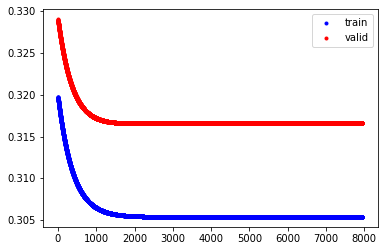

In [11]:
plt.plot(err_train, '.', label='train', color = 'blue')
plt.plot(err_valid, '.', label='valid', color = 'red');
plt.legend()

In [13]:
torch.save(model, "regression_multi_1.pt")